In [22]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [15]:
DATA_IN_PATH = './data/'
fileList = os.listdir(DATA_IN_PATH)
print(fileList)

['사회복지 분야 소관별 추이.CSV', '사회복지 분야 특별회계별 추이.CSV', '사회복지 분야 회계·기금별 추이.CSV', '사회복지 분야 부문별 추이.CSV', '사회복지 분야 주요 세부사업 현황.CSV', '사회복지 분야 국고보조금 추이.CSV', '사회복지 분야 재정구조.CSV', '사회복지 분야 성질별 추이.CSV', '사회복지 분야 기금별 추이.CSV']


In [79]:
def drawLastRow(fileName):
    global plotCount
    tempData = pd.read_csv(DATA_IN_PATH + fileName, encoding='CP949')
    tempData.drop('연도',inplace=True, axis=1)
    tempData.drop('기준',inplace=True, axis=1)

    plotCount = plotCount + 1
    lastRow = tempData.tail(1)
    
    plt.figure(plotCount)
    plt.bar(np.arange(tempData.shape[1]), lastRow.iloc[0])
    


[None, None, None, None, None, None, None, None, None]

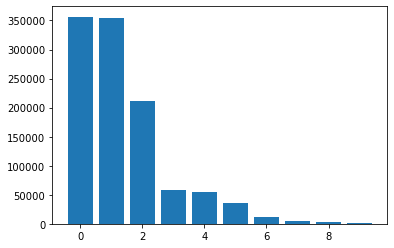

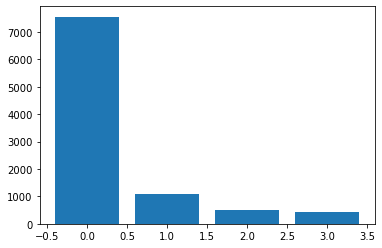

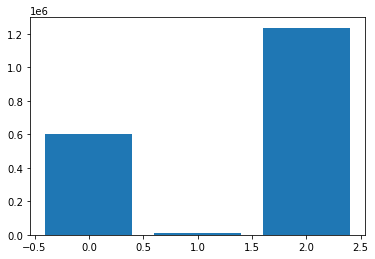

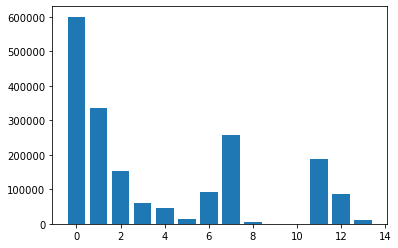

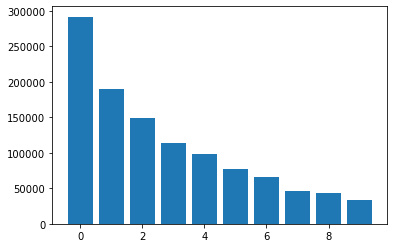

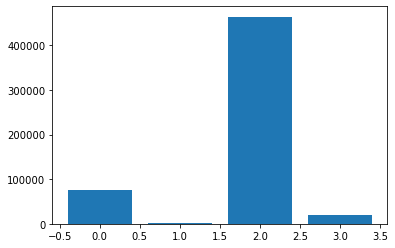

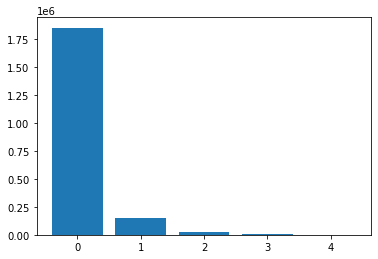

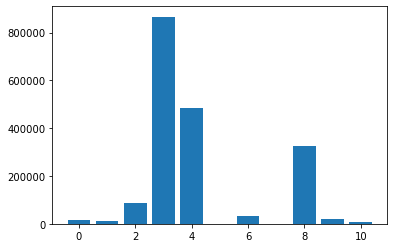

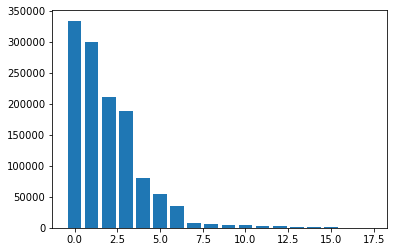

In [80]:
plotCount = 0
[drawLastRow(fileName) for fileName in fileList]
